# Ejemplo de Regresión Logistica Simple (una sola covariable)

La base de datos "Ejemplo5.csv" muestra la edad (X) y la presencia o ausencia de enfermedades coronarias
(Y) en una muestra de 100 personas. El objetivo del estudio es saber si la edad de una persona
influye en la aparición de una enfermedad coronaria.

La presencia/ausencia de enfermedad coronaria está codificada como 1/0, mientras que la edad está
recogida de forma continua en años.

In [2]:
ej5 <- read.csv(file = 'Ejemplo5.csv')
#ej5

Realizamos un diagrama de dispersión de Y respecto de X.

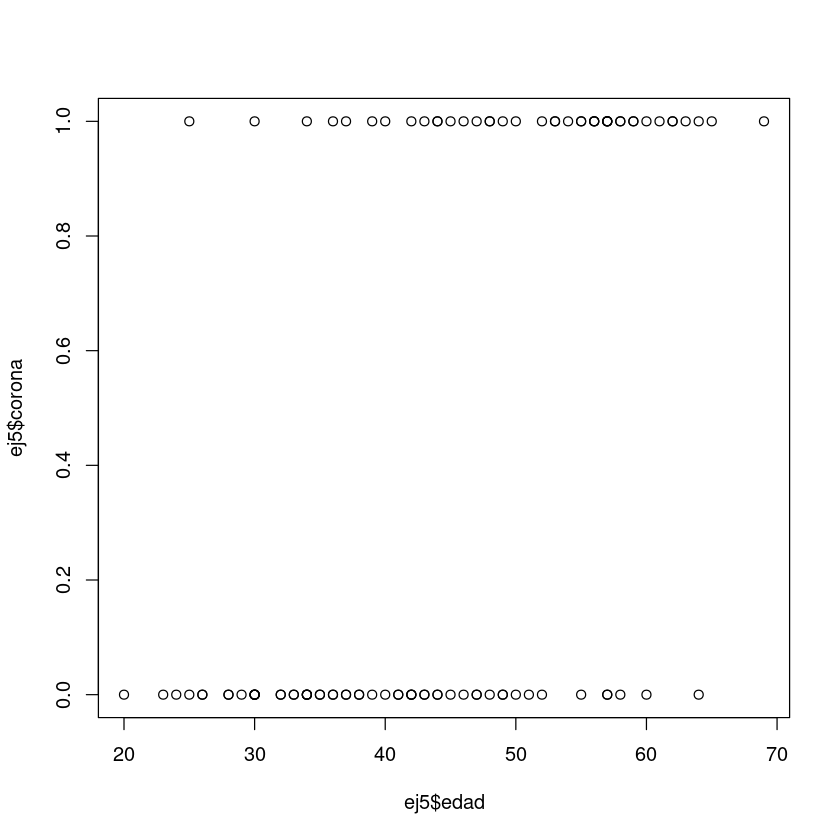

In [9]:
plot(ej5$edad, ej5$corona)

Este gráfico no es muy útil para describir la relación existente entre la edad y el hecho de padecer una enfermedad coronaria. La única conclusión que podríamos sacar es que hay más personas con enfermedad coronaria en edades avanzadas que en edades más jóvenes. Pero esto no nos dice nada acerca de la relación entre las variables.

Para medir el efecto de la edad en padecer una enfermedad coronaria, realizamos una regresión
logística de estos datos con R, y obtenemos los siguientes resultados:

In [11]:
glm.1<- glm(corona ~ edad, data=ej5, family=binomial)

In [12]:
summary(glm.1)


Call:
glm(formula = corona ~ edad, family = binomial, data = ej5)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9718  -0.8456  -0.4576   0.8253   2.2859  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.30945    1.13365  -4.683 2.82e-06 ***
edad         0.11092    0.02406   4.610 4.02e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.66  on 99  degrees of freedom
Residual deviance: 107.35  on 98  degrees of freedom
AIC: 111.35

Number of Fisher Scoring iterations: 4


Si  definimos  el  Modelo  1  como  el  modelo  que  únicamente  contiene  el  término  independiente  ($\beta_0$) y el Modelo 2 como el modelo que contiene al término independiente y la edad ($\beta_0$ y $\beta_1$), realizamos el siguiente contraste: 

* H0: Modelo 1 es preferible i. e. $\beta_1$ = 0

* H1: Modelo 2 es preferible i. e. $\beta_1 \neq 0$  

Realizamos el contraste de Razón de verosimilitud con 
$-2 lnL(Modelo1) = 136.663$ y $ -2lnL (Modelo2) = 107.353$

El estadistico es

$$G = -2ln \frac{L(Modelo1)}{L(Modelo2}= 136.663 - 107.353 = 29.31$$ 

Y el p-valor

$$p = P(\chi^2_1> 29.31) < 0.001$$

Por tanto, nos quedamos con el modelo 2.

Llegaremos a la misma conclusión mediante el contraste de Wald. El estadístico de este contraste es 

$$
W = \frac{\hat \beta_1}{\sqrt{Var{\hat \beta_1}}}=\frac{0.111}{0.024}= 4.61
$$

Por tanto,

$$
p = P(Z> 4.61) < 0.001  
$$

Los dos  contrastes  nos  llevan  a  admitir como  mejor  el  Modelo  2.  Además,  los  resultados  son  bastante parecidos, a saber, 5.41 (contraste de razón de verosimilitud) y 4.61 (test de Wald). Es  decir  concluimos  que  la  edad  tiene  una  influencia  estadísticamente  significativa  en  la  probabilidad de contraer una enfermedad coronaria. 

Estudiamos el odds ratio de la variable edad. Primero, vemos que $e^{\hat \beta_1}=1.117$ y ademas

$$
I_{\beta_1}^{0.95}=0.111\pm 1.96 \cdot 0.024 =(0.064, 0.158) \Rightarrow I_{OR}^{0.95}=(e^{0.064},e^{0.158})=(1.066, 1.171)
$$

El  odds  de  padecer  una  enfermedad  coronaria  aumenta  1.117  veces  (intervalo  de  confianza  del  95% (1.07, 1.17))  por cada aumento de un año en la edad. 

La ecuación del modelo sería la siguiente:

$$
Logit(p) = -5.309 + 0.111 \cdot EDAD
$$

Por ejemplo, una persona de 60 años, se predice que tiene la siguiente probabilidad de padecer una
enfermedad coronaria 

$$
p=\frac{e^{-5.309 + 0.111 \cdot 60}}{1+e^{-5.309 + 0.111 \cdot 60}}=0.79.
$$


### Variable independiente categorica

Supongamos  que  el  interés  radica  en  medir  el  efecto  de  la  edad,  pero  no  de  forma  continua,  sino  con  un  punto  de  corte  en,  por  ejemplo  50  años.  Es  decir,  queremos  saber  en  cuanto  aumenta el odds de padecer una enfermedad coronaria para los individuos con más de 50 años con  respecto  a  los  individuos  con  una  edad  de  50  años  o  inferior.  Para  ello  categorizamos  la  edad  en  dos  categorías  ($\leq$  50  vs.  $>$  50).  

In [17]:
#importante poner factor(edad2) para que lo tome como variable dicotomica
glm.2<-glm(corona ~ factor(edad2), data=ej5, family=binomial) 
summary(glm.2)


Call:
glm(formula = corona ~ factor(edad2), family = binomial, data = ej5)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6835  -0.7910  -0.7910   0.7452   1.6213  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.0014     0.2756  -3.634  0.00028 ***
factor(edad2)1   2.1409     0.4909   4.361 1.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.66  on 99  degrees of freedom
Residual deviance: 114.53  on 98  degrees of freedom
AIC: 118.53

Number of Fisher Scoring iterations: 4


La ecuación del modelo sería la siguiente:
$$
Logit(p) = -1.001 + 2.141·(EDAD>50)
$$

Tanto el test de Wald (Z = 4.361, p < 0.0001), como el contraste de razón de verosimilitud ($\chi^2_1$
= 21.13, p < 0.0001), nos hacen concluir que los individuos de más de 50 años tienen un riesgo
mayor de padecer una enfermedad coronaria que los de 50 o menos años de edad. 


Como $e^{2.141}=8.508$, un individuo de más de 50 años aumenta el odds de padecer una enfermedad coronaria en 8.5 con respecto a otro de 50 años o menos. Ademas,

$$
I^{0.95}_{\beta_1}=2.1409\pm 1.96 \cdot 0.4909 = (1.07, 1.17) \Rightarrow I^{0.95}_{OR}=(e^{1.07},e^{1.17})=(3.25, 22.27)
$$

El intervalo de confianza del 95% del OR es (1.07, 1.17)

Además, utilizando la ecuación del modelo, podemos calcular la probabilidad de padecer una
enfermedad coronaria para individuos de 50 o menos años de edad 

$$
p=\frac{e^{-1.001 + 2.141·0}}{1+e^{-1.001 + 2.141·0}}=0.269
$$

 y la probabilidad de
padecer una enfermedad coronaria para individuos con más de 50 años de edad 

$$
p=\frac{e^{-1.001 + 2.141·1}}{1+e^{-1.001 + 2.141·}}=0.758
$$

### Variable independiente categórica con 3 modalidades

Supongamos  que  el  interés  radica  en  medir  el  efecto  de  la  edad,  pero  no  de  forma  continua,  sino en  3  intervalos,  por  ejemplo  <  40,  [40  −  60)  y  ≥  60 años.  Es  decir,  queremos  saber  en  cuanto aumenta el odds de padecer una enfermedad coronaria para los individuos con una edad comprendida entre 40 y 60 años y para los individuos con 60 o más años de edad con respecto a los  individuos  con  una  edad  inferior  a  40  años.  Para  ello,  igual  que  en  el  caso  anterior,  categorizamos  la  edad  en  las  3  categorías  propuestas,  dejando  de  referencia  los  más  jovenes. Los resultados que obtenemos se resumen en las siguientes tablas

In [3]:
glm.3<-glm(corona ~ factor(edad3), data=ej5, family=binomial) 
summary(glm.3)


Call:
glm(formula = corona ~ factor(edad3), family = binomial, data = ej5)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7941  -1.2588  -0.5949   1.0982   1.9074  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.6422     0.4460  -3.682 0.000231 ***
factor(edad3)1   1.8315     0.5245   3.492 0.000479 ***
factor(edad3)2   3.0285     0.9077   3.336 0.000848 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.66  on 99  degrees of freedom
Residual deviance: 115.81  on 97  degrees of freedom
AIC: 121.81

Number of Fisher Scoring iterations: 4


La ecuación del modelo sería la siguiente:

$$
Logit(p) = –1.642 + 1.831·(EDAD∈[40, 60)) + 3.028 ·(EDAD≥60)
$$

En este caso, realizamos el contraste de razón de verosimilitud 

$$
G=-2Ln(M1)-(-2Ln(M2))=136.66-115.81=20.85
$$

por tanto, $p=P(\chi^2_1> 20.85) < 0.0001, lo cual nos hace concluir que la edad es un factor con una influencia significativa en el riesgo de padecer una enfermedad coronaria. 

El test de Wald nos indica que la diferencia en el riesgo en edades comprendidas en el  intervalo  [40,  60)  y  en  edad  ≥60  es  estadísticamente  significativa  en  ambos  casos  con  respecto a la categoría de referencia. 

La magnitud de la relación viene dada por los coeficientes del modelo.  Un  individuo  con  una  edad  comprendida  en  el  intervalo  [40,  60)  aumenta  el  odds  de  padecer  una enfermedad coronaria en 6.24 (observese que $6.24=e^{1.831}$) con respecto a otro con menos de 40 años y el intervalo de confianza del $95\%$ es

$$
I_{\beta_1}^{0.95}=1.8315\pm 1.96\cdot 0.5245=(0.803,2.859)
\Rightarrow I_{OR_{21}}=(2.23, 17.45) 
$$


Un individuo con 60 o más años de edad aumenta el odds de padecer una enfermedad coronaria en 20.7 ($e^{3.028}$) con respecto a otro con menos de 40 años y el intervalo de confianza del $95\%$ es

$$
I_{\beta_1}^{0.95}=3.029 \pm 1.96·0.908=(1.249, 4.809)
\Rightarrow I_{OR_{31}}=(3.487, 122.57) 
$$
